# Numerical Exercises 05

Before running this notebook, you need to:
 - compile: 
   - `cmake -S . -B build -DCMAKE_BUILD_TYPE=Release`
   - `cmake --build build/ -j <NUM_OF_CORES>` 
 - execute:

In [2]:
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib.style as style 
style.use('tableau-colorblind10')

# Exercise 05.1

## Sampling first two hydrogen wavefunction with the Metropolis algorithm

### Brief theoritical background
The system considered is a hydrogen atom, which is described (in the quantum mechanics framework) by its wavefunction $\Psi_N(\vec r, t)$. 

We are interested in computing the mean radial position of the ground state ($\Psi_{1,0,0}(r,\theta,\phi)$ and of the first excited state ($\Psi_{2,1,0}(r,\theta,\phi)$); thankfully, we have their respective analytic form, expressed in Bohr units $a_0= 4\pi\epsilon_0\hbar^2/m_e e^2=0.0529$: 
- **ground state**: $\Psi_{1,0,0}(r,\theta,\phi)=\frac{a_0^{-3/2}}{\sqrt{\pi}} e^{-r/a_0},$
- **first excited**: $\Psi_{2,1,0}(r,\theta,\phi)= \frac{a_0^{-5/2}}{8}\sqrt{\frac{2}{\pi}} r e^{-r/2a_0} \cos(\theta).$

They are time independent (being eigenstates of the hamiltonian), and the theoritical expectation values for mean radial position at any time are: 
- **ground state**: $\left\langle r \right\rangle_{\Psi_{1,0,0}} = \frac{3}{2}a_0$
- **first excited**: $\left\langle r \right\rangle_{\Psi_{2,1,0}} = 5 a_0$

### Brief overview of the Metropolis algorithm

The Metropolis algorithm is a Markov Chain Monte Carlo (MCMC) method used to obtain random samples from a difficult to sample probability distribution. 
In our case, the probability distributions are $|\Psi|^2$ as defined above. 

We define an ergodic transition probability from $\vec y$ to $\vec x$ as $K(\vec x|\vec y)$, which in our case can be built as: $K(\vec x | \vec y) = A(\vec y | \vec x)  T(\vec y | \vec x)$, where where $T$ is the **trial transition probability**, and $A$ is the probability to accept $\vec y$ as the next step after $\vec x$. In our code we use a **uniform** and a **gaussian** distribution as transition probabilities. With this choice, both of them are are symmetric with respect to $\vec x$ and $\vec y$, and we can define:
$$
q(x|y)=\frac {T(\vec{y}|\vec{x}) p(\vec{x})} {T(\vec{x}|\vec{y}) p(\vec{y})} =
\frac {p(\vec{x})} {p(\vec{y})}, \quad \quad A(\vec{x}|\vec{y}) = \min{\left[1,q(x|y)\right]}
$$

Using the above definitions we can sample the points from the above probability distributions, obtaining the average radial positions by simulating $M=10^7$ steps of the Markov chain, and for each of them calculating the radius $\langle r \rangle$, divided in $N=100$ blocks to obtain averages valued of the radius and uncertainties with the blocking method (which in this case also helps to mitigate the correlation between contiguos steps of the algorithm).

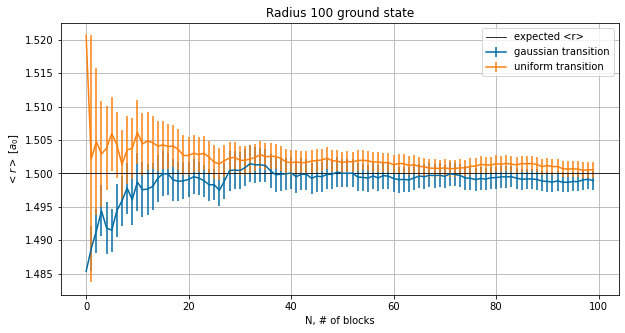

Gaussian transition | Error on the last block:  0.00143904
Uniform transition | Error on the last block:  0.00115526


In [3]:
r_gaus, er_gaus = np.loadtxt("build/results.gaussian.ground.origin.dat", delimiter=" ", unpack=True)
r_unif, er_unif = np.loadtxt("build/results.uniform.ground.origin.dat", delimiter=" ", unpack=True)

plt.figure(figsize=(10,5))
plt.errorbar(np.arange(r_gaus.size),r_gaus,yerr=er_gaus, label='gaussian transition')
plt.errorbar(np.arange(r_unif.size),r_unif,yerr=er_unif, label='uniform transition')
plt.axhline(1.5, 0, 100, color='k',linewidth=0.8,label='expected <r>')
plt.legend()
plt.grid(True)
plt.xlabel("N, # of blocks")
plt.ylabel("$<r>\ [a_0]$" )
plt.title ("Radius 100 ground state")
plt.show()

print("Gaussian transition | Error on the last block: ", er_gaus[-1])
print("Uniform transition | Error on the last block: ", er_unif[-1])

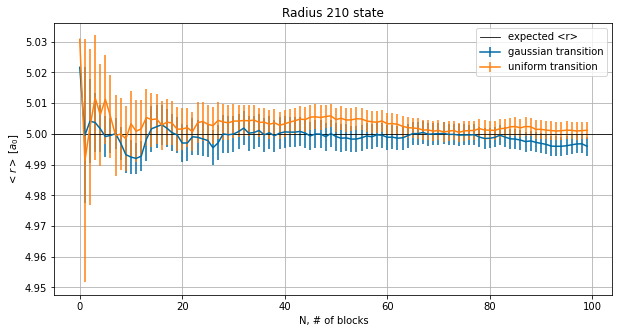

Gaussian transition | Error on the last block:  0.00313477
Uniform transition | Error on the last block:  0.00278685


In [4]:
r_gaus, er_gaus = np.loadtxt("build/results.gaussian.first-excited.origin.dat", delimiter=" ", unpack=True)
r_unif, er_unif = np.loadtxt("build/results.uniform.first-excited.origin.dat", delimiter=" ", unpack=True)

plt.figure(figsize=(10,5))
plt.errorbar(np.arange(r_gaus.size),r_gaus,yerr=er_gaus, label='gaussian transition')
plt.errorbar(np.arange(r_unif.size),r_unif,yerr=er_unif, label='uniform transition')
plt.axhline(5, 0, 100, color='k',linewidth=0.8,label='expected <r>')
plt.legend()
plt.grid(True)
plt.xlabel("N, # of blocks")
plt.ylabel('$<r>\ [a_0]$' )
plt.title ("Radius 210 state")
plt.show()

print("Gaussian transition | Error on the last block: ", er_gaus[-1])
print("Uniform transition | Error on the last block: ", er_unif[-1])

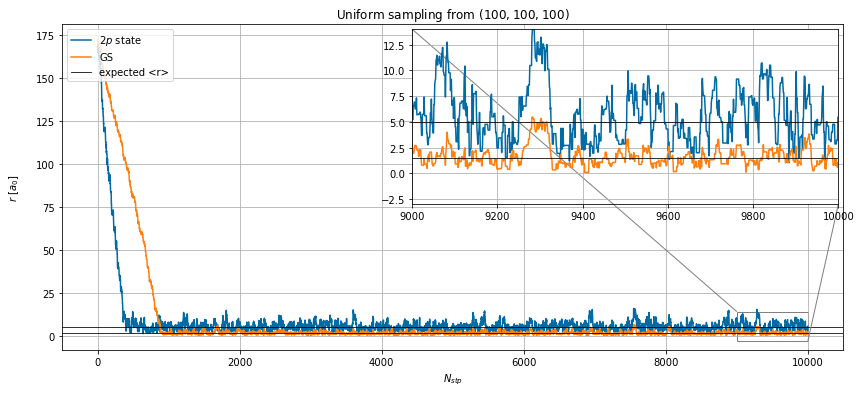

In [5]:
burnGS=np.genfromtxt('build/results.uniform.ground.far.dat',names='x,r')
burn210=np.genfromtxt('build/results.uniform.first-excited.far.dat',names='x,r')

fig, ax=plt.subplots(figsize=(14, 6))

plt.plot(burn210['x'],burn210['r'],label='$2p$ state')
plt.plot(burnGS['x'],burnGS['r'],label='GS')
plt.axhline(y=1.5,color='k',linewidth=0.8,label='expected <r>')
plt.axhline(y=5,color='k',linewidth=0.8)
plt.legend(loc='best')
plt.xlabel('$N_{stp}$')
plt.ylabel('$r\ [a_0]$',labelpad=15)
plt.title('Uniform sampling from $(100,100,100)$', size='large')
plt.legend(loc='upper left')
plt.grid(True)

axins = zoomed_inset_axes(ax, 6)
axins.plot(burn210['x'],burn210['r'],label='$2p$ state')
axins.plot(burnGS['x'],burnGS['r'],label='GS')
plt.axhline(y=1.5,color='k',linewidth=0.8,label='expected <r>')
plt.axhline(y=5,color='k',linewidth=0.8)
axins.set_xlim(9000,10000)
axins.set_ylim(-3, 14)
plt.xticks(visible=True)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid(True)
plt.show()

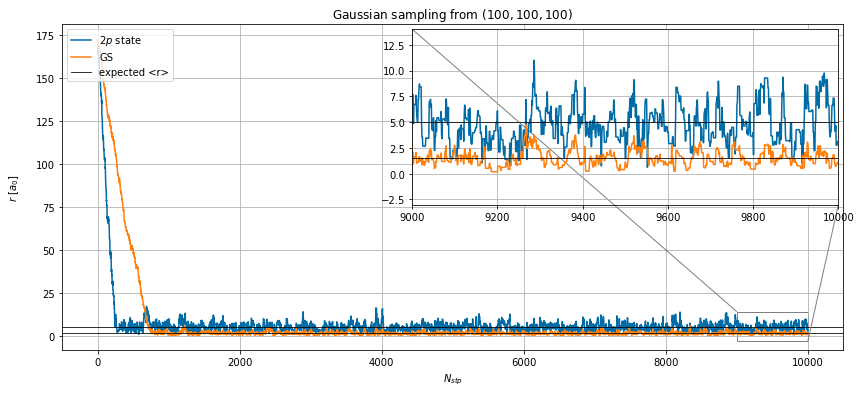

In [6]:
burnGS=np.genfromtxt('build/results.gaussian.ground.far.dat',names='x,r')
burn210=np.genfromtxt('build/results.gaussian.first-excited.far.dat',names='x,r')

fig, ax=plt.subplots(figsize=(14, 6))

plt.plot(burn210['x'],burn210['r'],label='$2p$ state')
plt.plot(burnGS['x'],burnGS['r'],label='GS')
plt.axhline(y=1.5,color='k',linewidth=0.8,label='expected <r>')
plt.axhline(y=5,color='k',linewidth=0.8)
plt.legend(loc='best')
plt.xlabel('$N_{stp}$')
plt.ylabel('$r\ [a_0]$',labelpad=15)
plt.title('Gaussian sampling from $(100,100,100)$', size='large')
plt.legend(loc='upper left')
plt.grid(True)

axins = zoomed_inset_axes(ax, 6)
axins.plot(burn210['x'],burn210['r'],label='$2p$ state')
axins.plot(burnGS['x'],burnGS['r'],label='GS')
plt.axhline(y=1.5,color='k',linewidth=0.8,label='expected <r>')
plt.axhline(y=5,color='k',linewidth=0.8)
axins.set_xlim(9000,10000)
axins.set_ylim(-3, 14)
plt.xticks(visible=True)
plt.yticks(visible=True)
mark_inset(ax, axins, loc1=2, loc2=4, fc="none", ec="0.5")
plt.grid(True)
plt.show()

In [7]:
title=('Ground State','$2p$ State')

def fig3D(if_far,transition_type,state):
    if if_far: state+="_far"
    pos=np.genfromtxt('build/positions.'+transition_type+'.'+state+'.dat',delimiter=' ',names='x,y,z')

    fig = plt.figure()
    ax = Axes3D(fig)
    ax.scatter(pos['x'], pos['y'], pos['z'], c=pos['z'], marker='.')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.view_init(1, 30)
    if (state=="ground") or (state=="ground_far"): plt.title(title[0])
    elif (state=="first-excited") or (satate=="first-excited_far"): plt.title(title[1])
    plt.show()

<ipython-input-7-ced1db7a47e6>:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


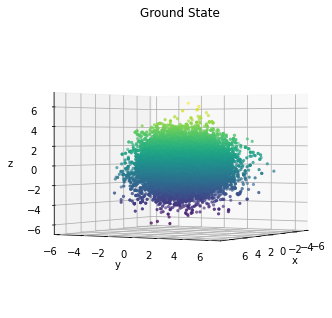

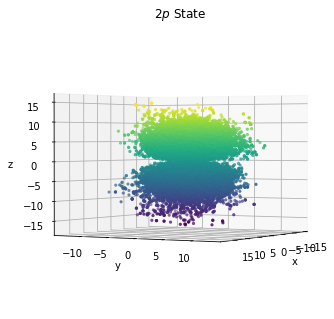

In [8]:
fig3D(False,"uniform","ground")
fig3D(False,"uniform","first-excited")

<ipython-input-7-ced1db7a47e6>:8: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


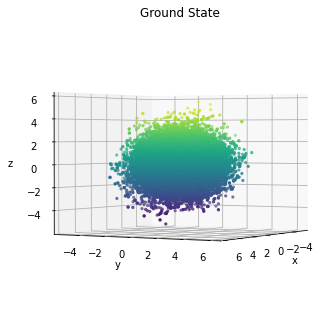

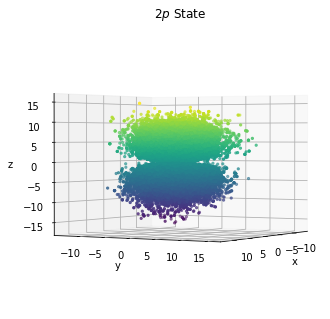

In [9]:
fig3D(False,"gaussian","ground")
fig3D(False,"gaussian","first-excited")